# Assignment Week 1 - Group 5

### Noelani Roy, Yihong Qiu, Cosimo Cambi, Craig Perkins

In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = "../fraudTrain.csv"
filename2 = "../fraudTest.csv"

df = pd.read_csv(filename)
df2 = pd.read_csv(filename2)

fraud_df = pd.concat([df, df2])

# print(fraud_df)

In [16]:
fraud_df.shape

(1852394, 28)

In [3]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

fraud_df['txn_datetime'] =  pd.to_datetime(fraud_df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

fraud_df['date_of_birth'] =  pd.to_datetime(fraud_df['dob'], format='%Y-%m-%d')
fraud_df['age'] = [calculate_age(d) for d in fraud_df['date_of_birth']]

fraud_df['year_of_birth'] = fraud_df['date_of_birth'].dt.year
fraud_df['date_of_birth'] = fraud_df['date_of_birth'].dt.date

fraud_df['txn_date'] = fraud_df['txn_datetime'].dt.date

In [4]:
import qgrid

qgrid.show_grid(fraud_df.head(100), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [10]:
txn_counts_by_city_pop = fraud_df['city_pop'].value_counts().sort_index().reset_index()
txn_counts_by_city_pop.columns = ['city_pop','count']

qgrid.show_grid(txn_counts_by_city_pop.head(100), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

Text(0, 0.5, 'count')

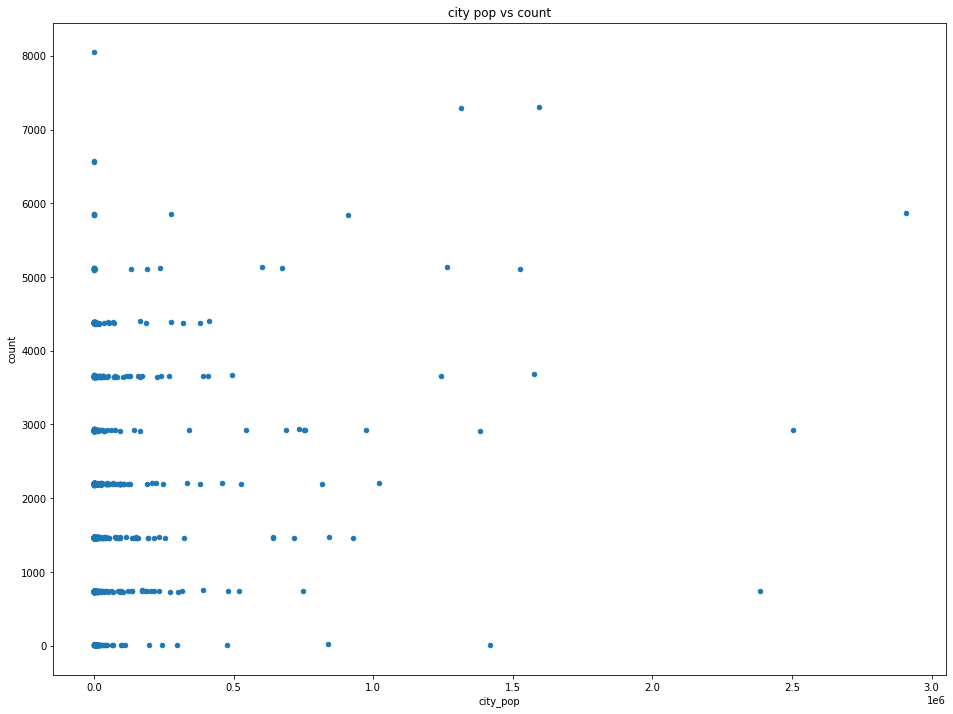

In [11]:
ax = txn_counts_by_city_pop.plot(kind='scatter', x='city_pop', y='count', figsize=(16,12), title='city pop vs count')
ax.set_xlabel('city_pop')
ax.set_ylabel('count')

In [12]:
txn_amounts_by_city_pop = fraud_df.groupby(['city_pop'])['amt'].agg('sum').sort_index().reset_index()
txn_amounts_by_city_pop.columns = ['city_pop','amt']

qgrid.show_grid(txn_amounts_by_city_pop.head(100), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

Text(0, 0.5, 'amt')

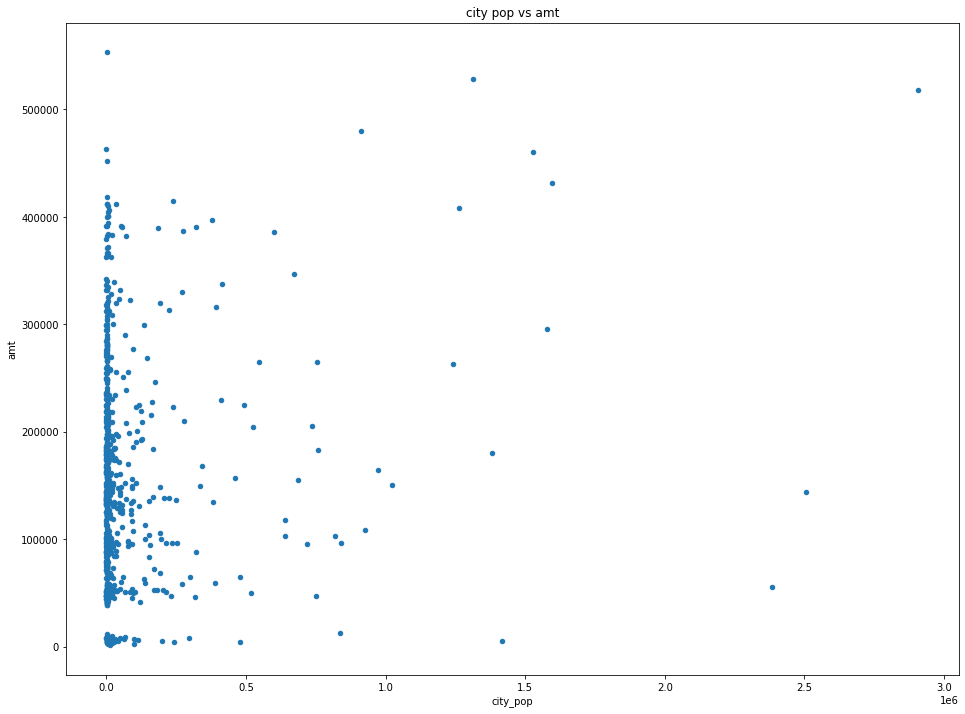

In [13]:
ax = txn_amounts_by_city_pop.plot(kind='scatter', x='city_pop', y='amt', figsize=(16,12), title='city pop vs amt')
ax.set_xlabel('city_pop')
ax.set_ylabel('amt')

In [14]:
txn_counts_by_age = fraud_df['age'].value_counts().sort_index().reset_index()
txn_counts_by_age.columns = ['age','count']

qgrid.show_grid(txn_counts_by_age.head(100), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

Text(0, 0.5, 'count')

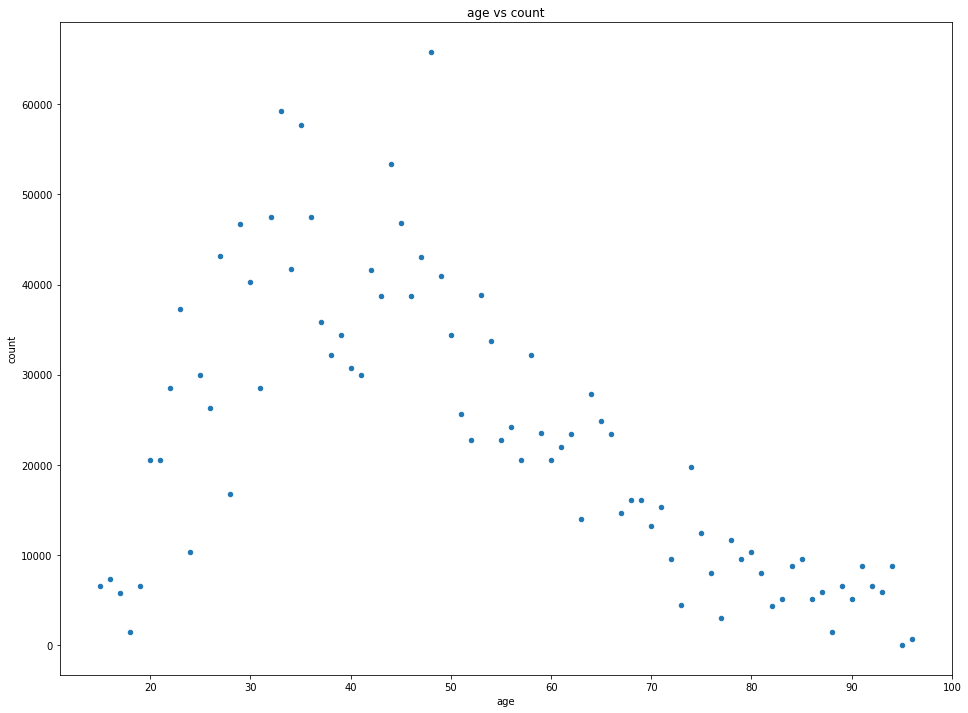

In [15]:
ax = txn_counts_by_age.plot(kind='scatter', x='age', y='count', figsize=(16,12), title='age vs count')
ax.set_xlabel('age')
ax.set_ylabel('count')

In [30]:
txn_amounts_by_age = fraud_df.groupby(['age'])['amt'].agg('sum').sort_index().reset_index()
txn_amounts_by_age.columns = ['age','amt']

qgrid.show_grid(txn_amounts_by_age.head(100), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

Text(0, 0.5, 'amt')

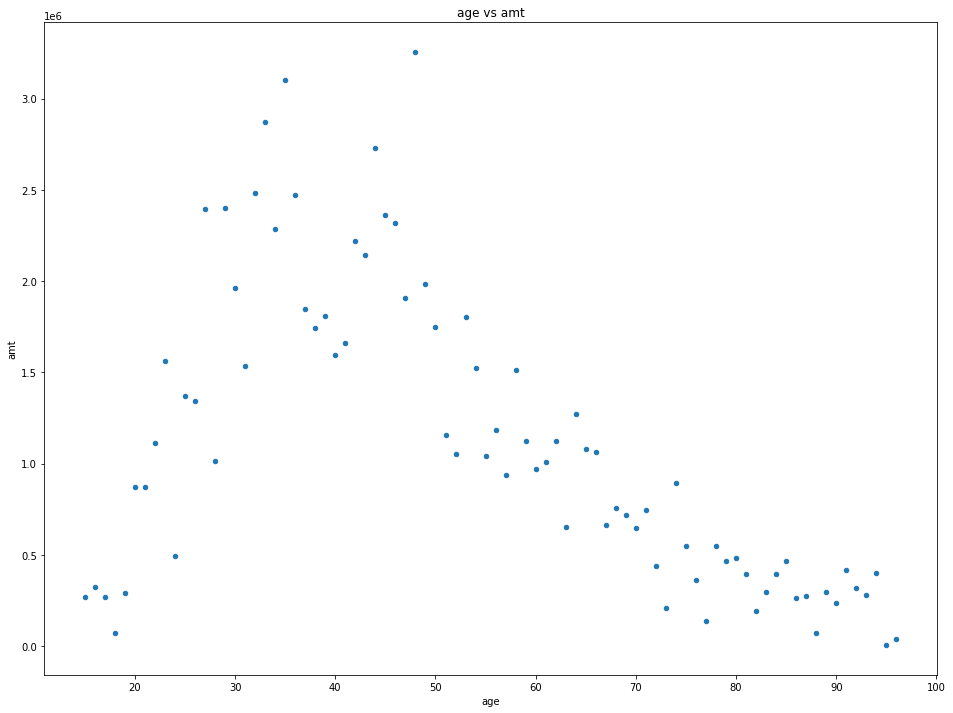

In [31]:
ax = txn_amounts_by_age.plot(kind='scatter', x='age', y='amt', figsize=(16,12), title='age vs amt')
ax.set_xlabel('age')
ax.set_ylabel('amt')

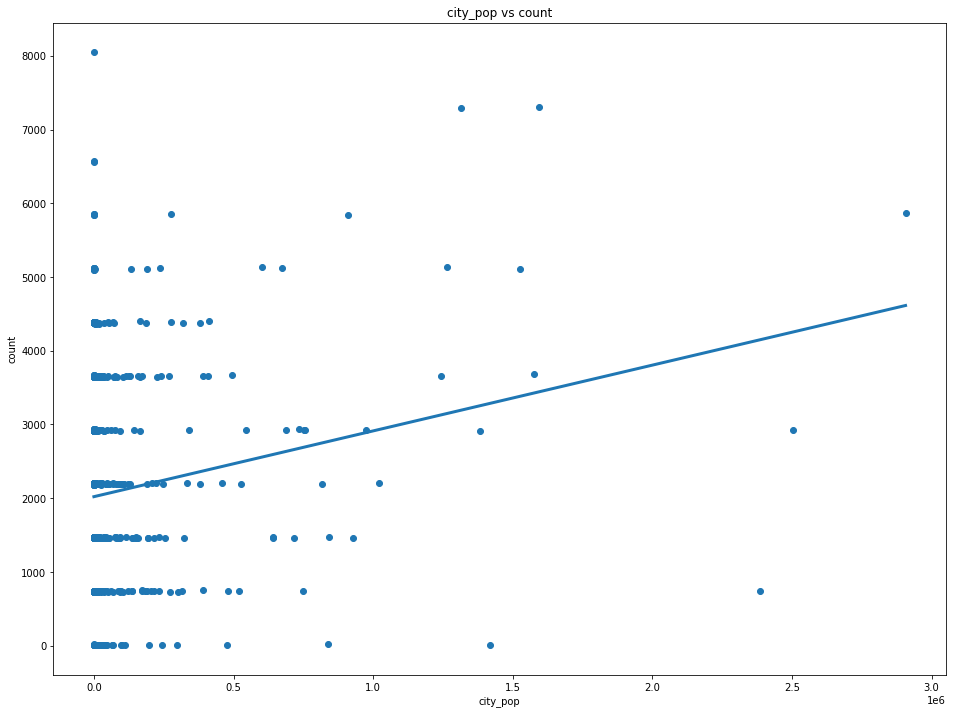

In [17]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

X = txn_counts_by_city_pop[['city_pop']]
y = txn_counts_by_city_pop[['count']]

regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(X, y)

# plot it as in the example at http://scikit-learn.org/
plt.figure(figsize=(16, 12))
plt.scatter(X, y)
plt.plot(X, regr.predict(X), linewidth=3)
plt.title('city_pop vs count')
plt.xlabel('city_pop')
plt.ylabel('count')
plt.show()

In [18]:
print(regr.coef_)
print(regr.intercept_)

[[0.00089208]]
[2020.99137073]


<AxesSubplot:ylabel='Count'>

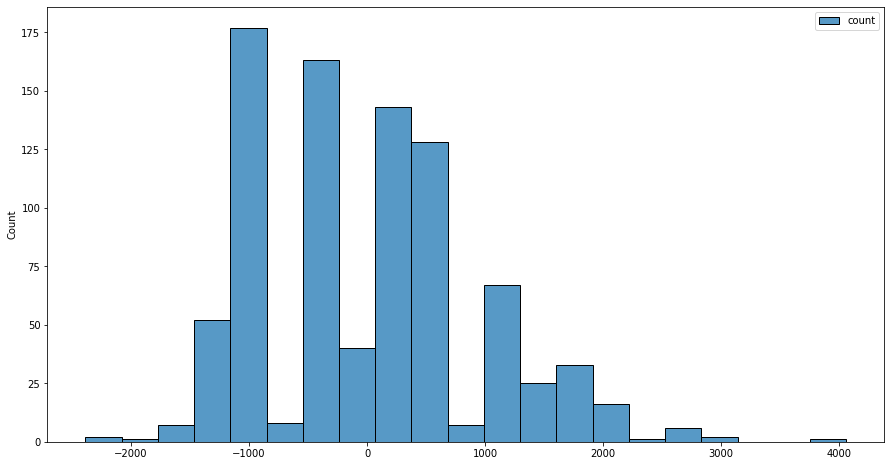

In [38]:
# Plot the average deviations from the predicted values

import seaborn as sns

plt.figure(figsize=(15,8))
sns.histplot(y - regr.predict(X))

       amt
7793  1.01
9521  1.01
6548  1.02
3080  1.03
2163  1.03
5130  1.03
9139  1.03
6893  1.03
953   1.03
7530  1.03


Text(0, 0.5, 'is_fraud')

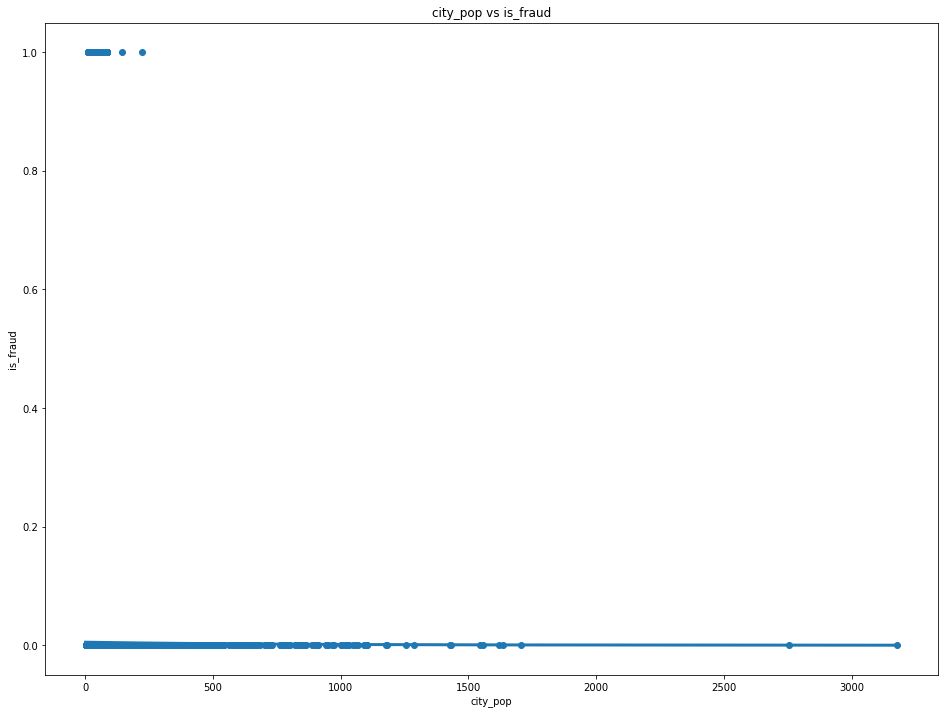

In [15]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing

# qgrid.show_grid(txn_counts_by_city_pop.head(100), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})


# ax = txn_counts_by_city_pop.plot(kind='scatter', x='city_pop', y='count', figsize=(16,12), title='age vs amt')

X = fraud_df.head(10000)[['amt']]
y = fraud_df.head(10000)['is_fraud'].ravel()

X = X.sort_values(by=['amt'])
print(X.head(10))

regr = linear_model.LogisticRegression()
regr.fit(X, y)

# plot it as in the example at http://scikit-learn.org/
plt.figure(figsize=(16, 12))
plt.scatter(X, y)
plt.plot(X, regr.predict_proba(X)[:,1], linewidth=3)
plt.title('city_pop vs is_fraud')
plt.xlabel('city_pop')
plt.ylabel('is_fraud')

# import seaborn as sns
# sns.regplot(x='amt', y='is_fraud', data=fraud_df.head(10000), logistic=True)



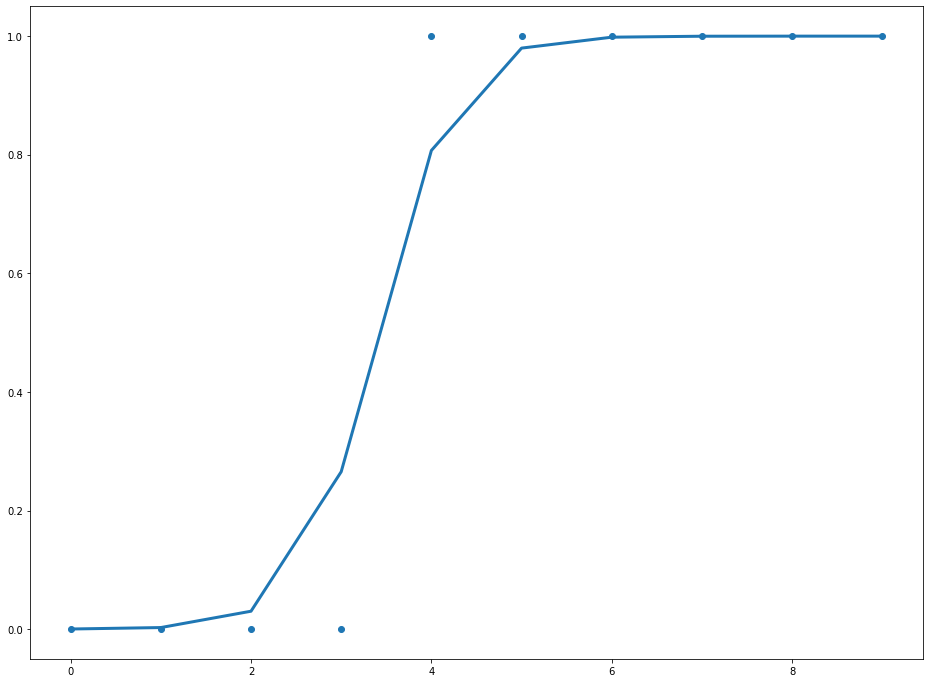

In [32]:
from sklearn import datasets, linear_model

X = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

model = linear_model.LogisticRegression(solver='liblinear', random_state=0, C=100.0)

model.fit(X, y)

plt.figure(figsize=(16, 12))
plt.scatter(X, y)
plt.plot(X, model.predict_proba(X)[:, 1], linewidth=3)

<ipython-input-29-62bba5ecbd19>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


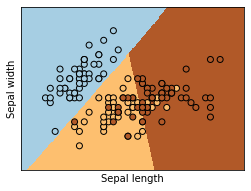

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

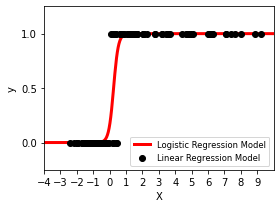

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

       amt
7793  1.01
9521  1.01
6548  1.02
3080  1.03
2163  1.03
5130  1.03
9139  1.03
6893  1.03
953   1.03
7530  1.03


Text(0, 0.5, 'gender')

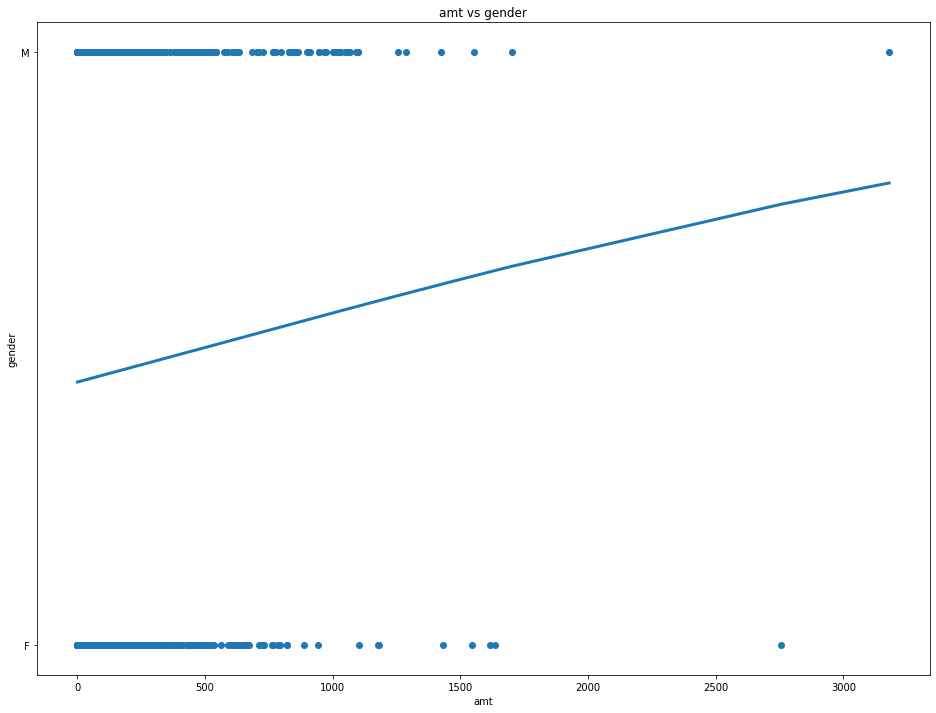

In [31]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing

# qgrid.show_grid(txn_counts_by_city_pop.head(100), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})


# ax = txn_counts_by_city_pop.plot(kind='scatter', x='city_pop', y='count', figsize=(16,12), title='age vs amt')

X = fraud_df.head(10000)[['amt']]
y = fraud_df.head(10000)['gender'].ravel()

X = X.sort_values(by=['amt'])
# y = np.where(y=='F', 1.0, y) 
# y = np.where(y=='M', 0.0, y) 

print(X.head(10))

regr = linear_model.LogisticRegression()
regr.fit(X, y)

# plot it as in the example at http://scikit-learn.org/
plt.figure(figsize=(16, 12))
plt.scatter(X, y)
plt.plot(X, regr.predict_proba(X)[:,1], linewidth=3)
plt.title('amt vs gender')
plt.xlabel('amt')
plt.ylabel('gender')

# import seaborn as sns
# sns.regplot(x='amt', y='is_fraud', data=fraud_df.head(10000), logistic=True)



In [15]:
fraud_df.groupby(['cc_num', 'first', 'last'])['amt'].agg('sum').nlargest(10)

cc_num            first    last    
6011367958204270  Tammy    Ayers       296436.73
4908846471916297  Lauren   Torres      290478.49
6011438889172900  Allison  Allen       284013.50
36722699017270    Jessica  Perez       280008.05
6011893664860915  Erin     Chavez      278325.97
6011109736646996  Rebecca  Erickson    278139.27
3583635130604947  Crystal  Gamble      278042.99
2712209726293386  Jenna    Brooks      277085.65
4836998673805450  Susan    Hardy       275930.63
372509258176510   Kristen  Hanson      275889.68
Name: amt, dtype: float64

In [18]:
fraud_counts = fraud_df['is_fraud'].value_counts().sort_index().reset_index()
fraud_counts.columns = ['is_fraud','count']

# print(fraud_counts)

no_fraud_count = fraud_counts.loc[fraud_counts['is_fraud'] == 0].iloc[0]['count']
fraud_count = fraud_counts.loc[fraud_counts['is_fraud'] == 1].iloc[0]['count']

percent_with_fraud = "{:.2f}".format(((fraud_count / no_fraud_count) * 100))

print(f"No Fraud Count: {no_fraud_count}")
print(f"Fraud Count: {fraud_count}")
print(f"Fraud Percentage: {percent_with_fraud}%")

   is_fraud    count
0         0  1289169
1         1     7506
No Fraud Count: 1289169
Fraud Count: 7506
Fraud Percentage: 0.58%
